## 데이터분석방법론(2) 기말과제

- 이 과목에서 배운 분석방법론(로지스틱회귀모형, 일반화선형모형, 로그선형모형, 혼합선형모형 등)을 이용하여 실제 데이터를 분석해 그 결과를 발표함

### 1. 데이터 찾기

#### (1) 관심 데이터: 한국고용정보원 취업현황 자료
- 고용노동부에서 운영중인 고용노동데이터 분석시스템(eis.work.go.kr/elds)에서는 다양한 고용노동 관련 데이터를 공개하고 있으며,   
그 중에서 취업현황_시군구(월) 자료를 내려받았다.

- 이 데이터는 2017년부터 2023년까지 유형별로 매월 취업건수가 몇 명인지 기록되어 있다.
  - 컬럼은 마감년월|근무시도|근무시군구|표준산업대분류|산업버전|직종중분류|직종버전|고용형태|거주시도|거주시군구|성별|연령5세단위|학력|취업건수 으로 구분된다.

#### (2) 데이터 읽기

- R을 사용하여 데이터를 분석하기 위해서 저장된 데이터를 dataframe 변수에 입력한다.

In [2]:
# ggplot2 패키지 로드
library(ggplot2)

In [3]:
# 취업건수 파일 이름 리스트 작성
file_names <- c(  
  "job_matching_2017.txt",
  "job_matching_2018.txt",
  "job_matching_2019.txt",
  "job_matching_2020.txt",
  "job_matching_2021.txt",
  "job_matching_2022.txt",
  "job_matching_2023.txt"
)

# 파일을 하나씩 읽어서 병합
jm <- do.call(rbind, lapply(file_names, function(file) {
  read.table(file, header = TRUE, sep = "|", stringsAsFactors = FALSE)
}))

In [4]:
# 취업건수 자료 읽기 결과 확인
head(jm)
nrow(jm) # 941만줄의 데이터가 존재한다.

,마감년월,근무시도,근무시군구,표준산업대분류,산업버전,직종중분류,직종버전,고용형태,거주시도,거주시군구,성별,연령5세단위,학력,취업건수
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,201712,26,26000,y,y,110000,2007,10,26,26200,M,10,3,2
2,201712,26,26320,y,y,220000,2007,99,26,26320,M,10,3,1
3,201712,41,41130,y,y,110000,2007,10,41,41610,M,11,3,1
4,201712,42,42810,y,y,230000,2007,20,42,42810,M,7,3,1
5,201712,43,43113,S,10,120000,2007,10,43,43114,F,3,5,1
6,201712,11,11380,y,y,110000,2007,10,11,11380,F,3,4,1


[1] 9412398

#### (3) 데이터 분석

In [5]:
# 전체 데이터 수
nrow(jm)

# 컬럼별 고유값의 개수
sapply(jm, function(x) length(unique(x)))

[1] 9412398

마감년월       근무시도     근무시군구 표준산업대분류       산업버전 
            84             21            303             22              3 
    직종중분류       직종버전       고용형태       거주시도     거주시군구 
            51              2              6             19            280 
          성별    연령5세단위           학력       취업건수 
             2             10              5            371

In [6]:
# 취업건수 데이터 분포가 어떤지 알아보자
head(table(jm$취업건수), 50)


      1       2       3       4       5       6       7       8       9      10 
8533899  586743  130944   53152   24083   12300    8600    8326    6346    4045 
     11      12      13      14      15      16      17      18      19      20 
   3163    3326    3052    2203    1831    1923    1834    1833    1838    2001 
     21      22      23      24      25      26      27      28      29      30 
   1914    1628     984     832     751     764     604     580     501     514 
     31      32      33      34      35      36      37      38      39      40 
    406     368     318     327     365     335     303     351     277     323 
     41      42      43      44      45      46      47      48      49      50 
    225     254     207     232     201     205     144     176     149     139 

전체 데이터는 941만행인데, 데이터가 지나치게 세분화되어 있다고 판단된다. 취업건수=1인 데이터가 너무 많은 것을 보면 이를 확인할 수 있다.  
이것은 유형이 너무 세분화되어 있기 때문이므로 분석 필요성이 크지 않은 근무시군구, 거주시군구는 자료에서 제외한다.  
근무시군구와 거주시군구를 제외하고 다시 데이터를 만든다.

In [10]:
# 포아송 분포의 특징: mean = var
mean(jm$취업건수)
var(jm$취업건수)

[1] 1.29675

[1] 12.67434

In [7]:
# 근무시군구, 거주시군구 제외한 데이터 생성
jm2 = aggregate(취업건수 ~ 마감년월+근무시도+표준산업대분류+산업버전+직종중분류+직종버전+고용형태+성별+연령5세단위+학력, data=jm, sum)

In [105]:
# 전체 데이터 수
nrow(jm2)

# 컬럼별 고유값의 개수
sapply(jm2, function(x) length(unique(x)))

[1] 2930428

마감년월       근무시도 표준산업대분류       산업버전     직종중분류 
            84             21             22              3             51 
      직종버전       고용형태           성별    연령5세단위           학력 
             2              6              2             10              5 
      취업건수   log_취업건수 
           851            848

In [ ]:
# 취업건수 데이터 분포가 어떤지 알아보자
head(table(jm2$취업건수), 50)


      1       2       3       4       5       6       7       8       9      10 
1633026  470577  223822  132452   86972   61533   46223   36052   28371   23388 
     11      12      13      14      15      16      17      18      19      20 
  18850   15880   13572   11806   10021    8805    7618    6918    6359    5586 
     21      22      23      24      25      26      27      28      29      30 
   5059    4656    4029    3671    3430    3056    2819    2600    2360    2245 
     31      32      33      34      35      36      37      38      39      40 
   2012    1885    1678    1698    1540    1382    1339    1317    1228    1150 
     41      42      43      44      45      46      47      48      49      50 
   1044    1047     943     912     865     848     791     729     680     619 

In [11]:
# 포아송 분포의 특징: mean = var
mean(jm2$취업건수)
var(jm2$취업건수)

[1] 4.1651

[1] 307.5908

전체 데이터가 293만행이고, 취업건수=1 인 데이터가 163만개로 너무 많다.  
어떤 컬럼을 제외해야할지 살펴볼 필요가 있어 보인다.

In [106]:
# 산업버전과 표준산업대분류 테이블 현황
table(jm2$산업버전, jm2$표준산업대분류)

    
           A       B       C       D       E       F       G       H       I
  09     556      54   14016     179     414    2258    4735    1627    2445
  10    5248     399  174560    2096    4779   23778   53387   24762   22916
  y        0       0       0       0       0       0       0       0       0
    
           J       K       L       M       N       O       P       Q       R
  09    1204     563    1680    2129    8940    5092    3660    9012     587
  10   13163    5624   19427   24295   95948   30845   35158  123089    6666
  y        0       0       0       0       0       0       0       0       0
    
           S       T       U       y
  09    3039     878       3  117430
  10   27351    7668      28       0
  y        0       0       0 2048740

293만행의 데이터 중에서 204만행의 표준산업대분류 값이 y로 기록되어 있는데, 이는 표준산업대분류 정보가 존재하지 않는다는 것을 의미한다.
따라서 데이터로서의 가치가 낮다고 판단되므로 표준산업대분류 컬럼을 제외하고 jm3 를 생성한다.

In [111]:
# 산업버전, 표준산업대분류 제외한 데이터 생성
jm3 = aggregate(취업건수 ~ 마감년월+근무시도+직종중분류+직종버전+고용형태+성별+연령5세단위+학력, data=jm2, sum)

In [112]:
# 전체 데이터 수
nrow(jm3)

# 컬럼별 고유값의 개수
sapply(jm3, function(x) length(unique(x)))

[1] 2385103

마감년월    근무시도  직종중분류    직종버전    고용형태        성별 
         84          21          51           2           6           2 
연령5세단위        학력    취업건수 
         10           5         963

In [113]:
# 취업건수 데이터 분포가 어떤지 알아보자
head(table(jm3$취업건수), 50)


      1       2       3       4       5       6       7       8       9      10 
1181617  401883  203367  124201   83580   59972   45634   35592   28342   23524 
     11      12      13      14      15      16      17      18      19      20 
  19197   16682   14046   12284   10659    9300    8056    7199    6402    5740 
     21      22      23      24      25      26      27      28      29      30 
   5136    4559    4214    3889    3475    3197    2949    2804    2528    2470 
     31      32      33      34      35      36      37      38      39      40 
   2209    2047    1810    1755    1664    1464    1459    1408    1276    1242 
     41      42      43      44      45      46      47      48      49      50 
   1075    1115    1039     972     946     904     839     803     743     714 

In [114]:
# 포아송 분포의 특징: mean = var
mean(jm3$취업건수)
var(jm3$취업건수)

[1] 5.1174

[1] 520.9259

전체 데이터가 238만행이고, 취업건수=1 인 데이터가 118만개로 아직도 너무 많다.  
추가로 어떤 컬럼을 제외해야할지 살펴볼 필요가 있어 보인다.

In [118]:
# 직종버전과 직종중분류류 테이블 현황
table(jm3$직종버전, jm3$직종중분류)

      
       010000 020000 030000  10000 100000 110000 120000 130000 140000 150000
  2007      0      0      0  17761  14726  22290   9475  17160  15886  14098
  2018  14439  33687   4716  68761      0   3693  10483  37875  58148  81125
      
       160000 170000 180000 190000  20000 200000 210000 220000 230000 240000
  2007   8044   6531   3846  16278  29685   7185   8486  19459   7810    205
  2018      0      0      0      0 157616      0  69472  14551 129305   3611
      
       250000  30000 300000  40000 410000 420000  50000 510000 520000 530000
  2007      0   4612      0  15452      0      0   2764      0      0      0
  2018    907  21745 109034      0  62384  17934      0  30874  25464 108754
      
       540000 550000 560000  60000 610000 620000  70000 700000  80000 810000
  2007      0      0      0  20358      0      0  19463      0  11640      0
  2018  65313  83821  96351      0  96860  84930      0  69587      0  81370
      
       820000 830000 840000 850000 860000

직종버전이 2007, 2018이 존재하는데, 서로 버전이 맞지 않아 오래된 2007 버전의 직종정보를 제외하기로 한다.  
직종이 2007 버전으로 기록된 데이터가 언제까의 데이터인지 확인한다.

In [119]:
table(jm3$마감년월, jm3$직종버전)

        
          2007  2018
  201701 24521     0
  201702 25874     0
  201703 29790     0
  201704 26346     0
  201705 24202     0
  201706 25023     0
  201707 25701     0
  201708 25309     0
  201709 26914     0
  201710 22755     0
  201711 26108     0
  201712 23190     0
  201801     0 28344
  201802     0 26446
  201803     0 31871
  201804     0 29148
  201805     0 26767
  201806     0 25841
  201807     0 27571
  201808     0 26659
  201809     0 26512
  201810     0 26449
  201811     0 27293
  201812     0 23157
  201901     0 27856
  201902     0 25023
  201903     0 32078
  201904     0 28611
  201905     0 26820
  201906     0 25124
  201907     0 27546
  201908     0 25065
  201909     0 25576
  201910     0 26395
  201911     0 24917
  201912     0 22393
  202001     0 26130
  202002     0 26922
  202003     0 28614
  202004     0 26510
  202005     0 25237
  202006     0 25855
  202007     0 27522
  202008     0 29482
  202009     0 29797
  202010     0 27693
  20

2018년 이후 데이터는 직업버전이 2018이므로, 2017년 자료를 데이터에서 제외한다.

In [122]:
# 마감년월의 앞 4자리가 2017이 아닌 데이터만 필터링
jm4 <- jm3[substr(jm3$마감년월, 1, 4) != "2017", ]

In [123]:
# 직종버전과 직종중분류류 테이블 현황
table(jm4$직종버전, jm4$직종중분류)

      
       010000 020000 030000  10000 110000 120000 130000 140000 150000  20000
  2018  14439  33687   4716  68761   3693  10483  37875  58148  81125 157616
      
       210000 220000 230000 240000 250000  30000 300000 410000 420000 510000
  2018  69472  14551 129305   3611    907  21745 109034  62384  17934  30874
      
       520000 530000 540000 550000 560000 610000 620000 700000 810000 820000
  2018  25464 108754  65313  83821  96351  96860  84930  69587  81370  44876
      
       830000 840000 850000 860000 870000 880000 890000 900000      y
  2018  91966  16018  34117  18504  46671  36198 105798  42411      1

In [124]:
# 전체 데이터 수
nrow(jm4)

# 컬럼별 고유값의 개수
sapply(jm4, function(x) length(unique(x)))

[1] 2079370

마감년월    근무시도  직종중분류    직종버전    고용형태        성별 
         72          21          39           1           6           2 
연령5세단위        학력    취업건수 
         10           5         856

In [125]:
# 취업건수 데이터 분포가 어떤지 알아보자
head(table(jm4$취업건수), 50)


      1       2       3       4       5       6       7       8       9      10 
1045109  351334  176724  107148   71846   51393   39115   30440   23994   19951 
     11      12      13      14      15      16      17      18      19      20 
  16282   14060   11867   10232    8933    7691    6637    5975    5264    4706 
     21      22      23      24      25      26      27      28      29      30 
   4222    3770    3413    3197    2795    2619    2400    2306    2026    2008 
     31      32      33      34      35      36      37      38      39      40 
   1794    1647    1443    1402    1366    1171    1197    1137    1021     988 
     41      42      43      44      45      46      47      48      49      50 
    874     879     830     777     777     748     668     653     587     560 

In [156]:
model1 = glm(취업건수~성별+학력+연령5세단위, data=jm4, family= poisson(link="log"))

In [157]:
summary(model1)


Call:
glm(formula = 취업건수 ~ 성별 + 학력 + 연령5세단위, 
    family = poisson(link = "log"), data = jm4)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.6650049  0.0010346  1609.3   <2e-16 ***
성별M       -0.4920770  0.0006505  -756.4   <2e-16 ***
학력4       -0.4920749  0.0009111  -540.1   <2e-16 ***
학력5       -0.3183602  0.0008291  -384.0   <2e-16 ***
학력6       -1.2794776  0.0025069  -510.4   <2e-16 ***
학력y        1.7073900  0.0009895  1725.5   <2e-16 ***
연령5세단위  0.0387158  0.0001274   303.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 25929556  on 2079369  degrees of freedom
Residual deviance: 21524691  on 2079363  degrees of freedom
AIC: 27107779

Number of Fisher Scoring iterations: 7


In [129]:
# 근무시도 제외한 데이터 생성
jm5 = aggregate(취업건수 ~ 마감년월+직종중분류+직종버전+고용형태+성별+연령5세단위+학력, data=jm4, sum)

In [130]:
# 전체 데이터 수
nrow(jm5)

# 컬럼별 고유값의 개수
sapply(jm5, function(x) length(unique(x)))

[1] 429927

마감년월  직종중분류    직종버전    고용형태        성별 연령5세단위 
         72          39           1           6           2          10 
       학력    취업건수 
          5        1490

In [131]:
# 취업건수 데이터 분포가 어떤지 알아보자
head(table(jm5$취업건수), 50)


     1      2      3      4      5      6      7      8      9     10     11 
113803  56687  35656  25169  19083  15204  12527  10477   8851   7880   6866 
    12     13     14     15     16     17     18     19     20     21     22 
  6104   5432   4858   4493   4058   3805   3400   3236   3072   2883   2615 
    23     24     25     26     27     28     29     30     31     32     33 
  2471   2268   2240   2121   1963   1783   1758   1650   1600   1444   1444 
    34     35     36     37     38     39     40     41     42     43     44 
  1324   1328   1250   1159   1159   1082   1018    971    946    923    876 
    45     46     47     48     49     50 
   809    799    764    780    761    793 

In [133]:
mean(jm5$취업건수)
min(jm5$취업건수)
max(jm5$취업건수)
var(jm5$취업건수)

[1] 23.38272

[1] 1

[1] 7628

[1] 15708.67

In [134]:
ks_poisson <- ks.test(jm5$취업건수, "ppois", lambda = mean(jm5$취업건수))
ks_poisson

Warning message in ks.test.default(jm5$취업건수, "ppois", lambda = mean(jm5$취업건수)):
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  jm5$취업건수
D = 0.73851, p-value < 2.2e-16
alternative hypothesis: two-sided


In [87]:
# log(취업건수) 컬럼을 추가해보자
jm2$log_취업건수 = round(log(jm2$취업건수+0.184),3)

In [102]:
# log_취업건수 데이터 분포가 어떤지 알아보자
head(table(jm2$log_취업건수), 50)


  0.169   0.781   1.158   1.431   1.646   1.822   1.972   2.102   2.217   2.321 
1633026  470577  223822  132452   86972   61533   46223   36052   28371   23388 
  2.414     2.5   2.579   2.652    2.72   2.784   2.844   2.901   2.954   3.005 
  18850   15880   13572   11806   10021    8805    7618    6918    6359    5586 
  3.053   3.099   3.143   3.186   3.226   3.265   3.303   3.339   3.374   3.407 
   5059    4656    4029    3671    3430    3056    2819    2600    2360    2245 
   3.44   3.471   3.502   3.532   3.561   3.589   3.616   3.642   3.668   3.693 
   2012    1885    1678    1698    1540    1382    1339    1317    1228    1150 
  3.718   3.742   3.765   3.788   3.811   3.833   3.854   3.875   3.896   3.916 
   1044    1047     943     912     865     848     791     729     680     619 

In [89]:
# 포아송 분포의 특징: mean = var
mean(jm2$log_취업건수)
var(jm2$log_취업건수)

[1] 0.7585946

[1] 0.7585417

In [103]:
# 로그 값 역변환 후 카운트화
exp_취업건수 <- round(exp(jm2$log_취업건수))

# 빈도 계산
observed <- table(exp_취업건수)

# 포아송 분포에 따른 예상 빈도 계산
lambda <- mean(exp_취업건수)
expected <- dpois(as.numeric(names(observed)), lambda) * sum(observed)

# Chi-squared 적합도 검정
chi_sq_test <- chisq.test(x = observed, p = expected / sum(expected))

# 결과 출력
print(chi_sq_test)

Warning message in chisq.test(x = observed, p = expected/sum(expected)):
"Chi-squared approximation may be incorrect"



	Chi-squared test for given probabilities

data:  observed
X-squared = Inf, df = 838, p-value < 2.2e-16



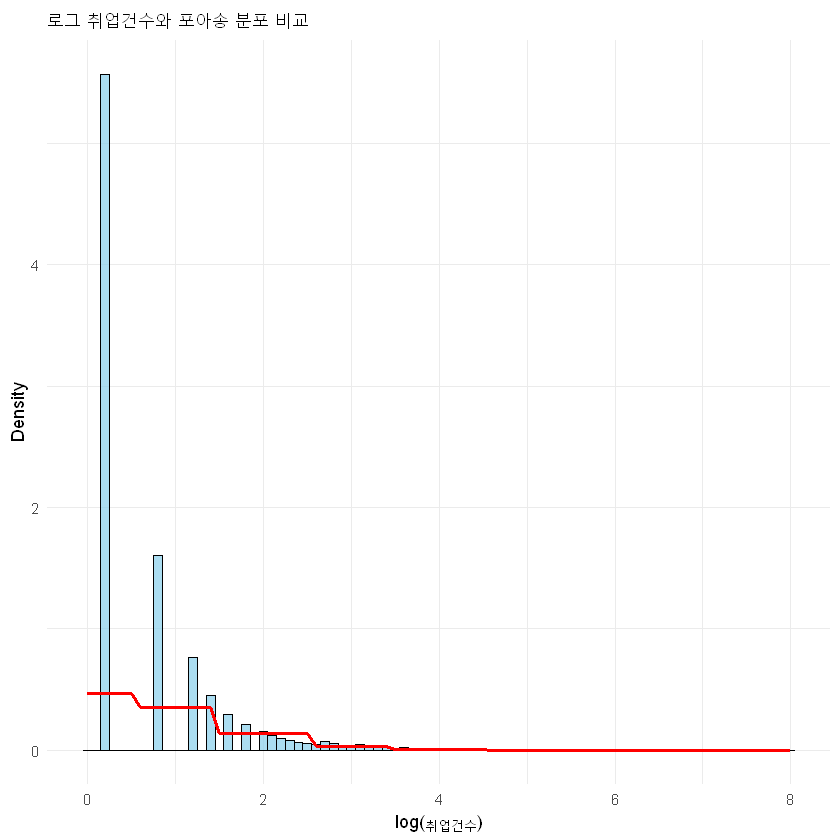

In [104]:
# 1. 로그 변환된 취업건수 데이터
log_counts <- jm2$log_취업건수

# 2. 포아송 분포의 lambda 계산 (로그 변환된 값의 평균)
lambda <- mean(log_counts)

# 3. 로그 취업건수의 범위 설정
x_range <- seq(floor(min(log_counts)), ceiling(max(log_counts)), by = 0.1)

# 4. 포아송 분포를 계산 (로그 변환된 값의 확률밀도)
poisson_density <- dpois(round(x_range), lambda)

# 5. 데이터프레임 생성 (히스토그램과 포아송 분포를 함께 그리기 위해)
poisson_df <- data.frame(
  x = x_range,
  poisson_density = poisson_density
)

# 6. 히스토그램과 포아송 분포 그래프
ggplot() +
  geom_histogram(aes(x = log_counts, y = ..density..), 
                 binwidth = 0.1, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_line(data = poisson_df, aes(x = x, y = poisson_density), 
            color = "red", size = 1) +
  labs(title = "로그 취업건수와 포아송 분포 비교", 
       x = "log(취업건수)", 
       y = "Density") +
  theme_minimal()


Warning message:
"Removed 9881 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`)."


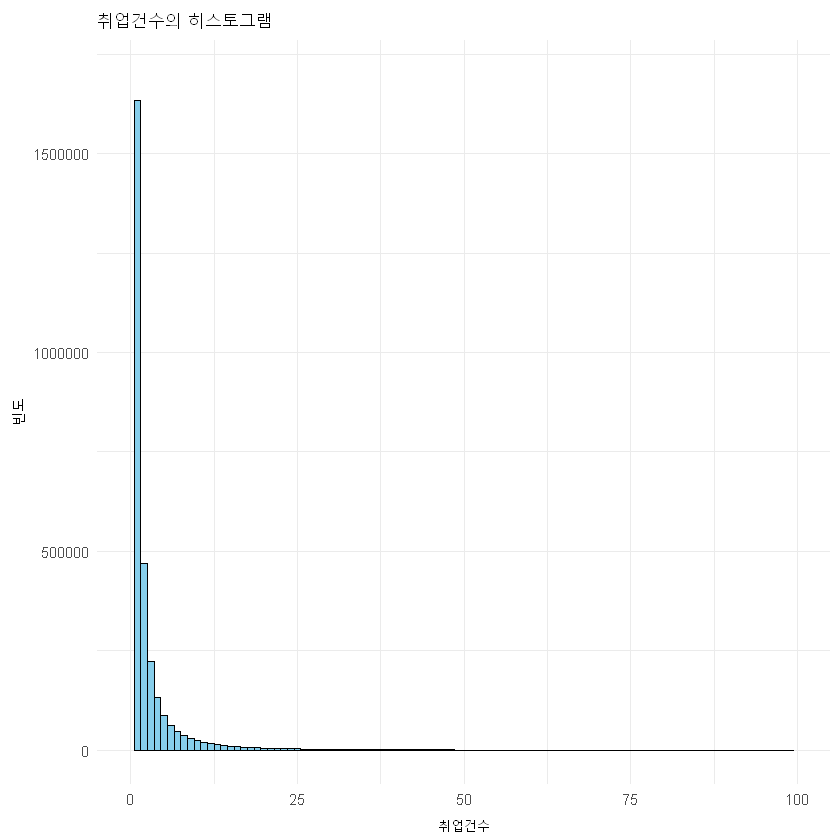

In [65]:
# 취업건수에 대한 히스토그램
ggplot(jm2, aes(x = 취업건수)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "취업건수의 히스토그램", x = "취업건수", y = "빈도") +
  xlim(0, 100) + ylim(0, 1700000) +
  theme_minimal()

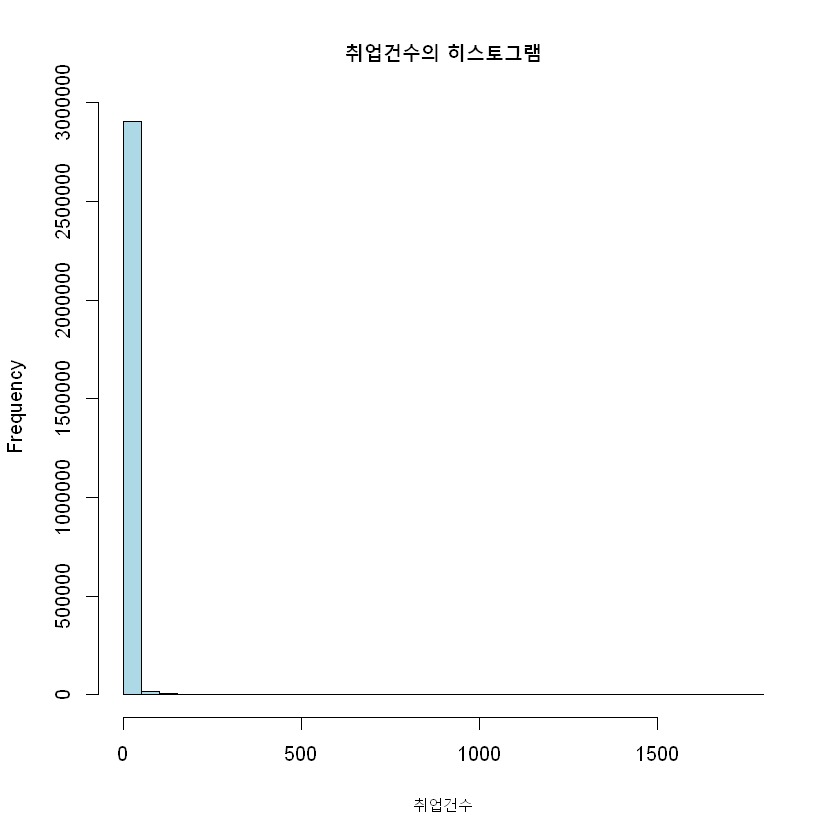

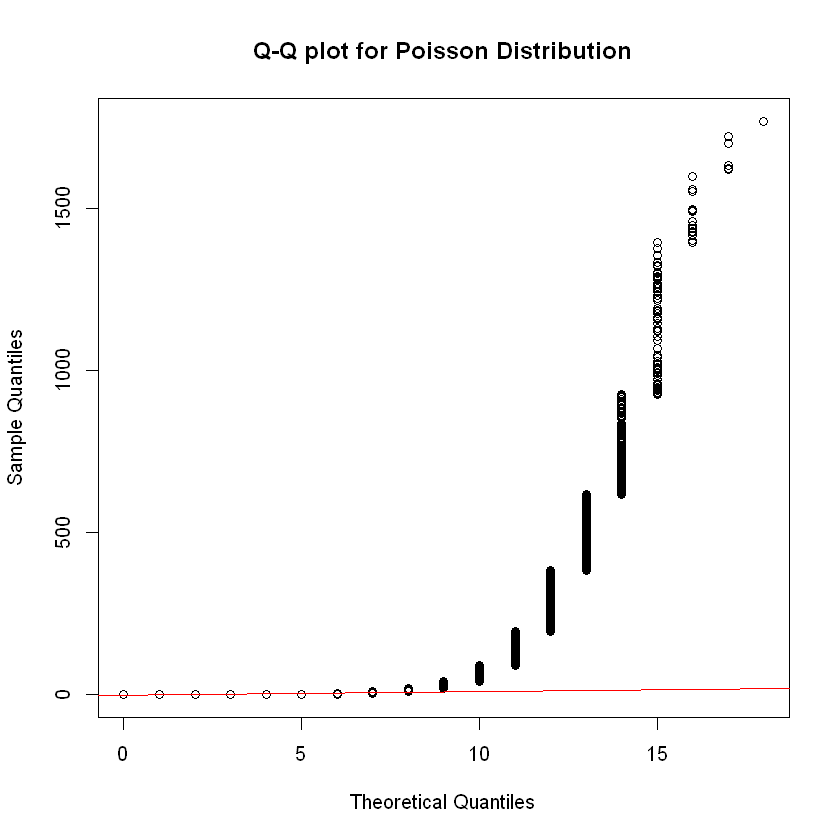

In [67]:
# 히스토그램
hist(jm2$취업건수, breaks = 50, main = "취업건수의 히스토그램", xlab = "취업건수", col = "lightblue", border = "black")

# Q-Q 플롯 (포아송 분포와 비교)
qqplot(qpois(ppoints(length(jm2$취업건수)), lambda = mean_value), jm2$취업건수, 
       main = "Q-Q plot for Poisson Distribution", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
abline(0, 1, col = "red")  # 이상적인 포아송 분포에 대한 직선 추가


In [68]:
# 포아송 분포의 기대값 계산
lambda_estimate <- mean(jm2$취업건수)
poisson_probs <- dpois(0:max(jm2$취업건수), lambda = lambda_estimate)

# 관찰 빈도 계산
observed_counts <- table(jm2$취업건수)

# 카이제곱 적합도 검정
chi_square_test <- chisq.test(observed_counts, p = poisson_probs[1:length(observed_counts)], rescale.p = TRUE)
chi_square_test


Warning message in chisq.test(observed_counts, p = poisson_probs[1:length(observed_counts)], :
"Chi-squared approximation may be incorrect"



	Chi-squared test for given probabilities

data:  observed_counts
X-squared = Inf, df = 850, p-value < 2.2e-16


In [69]:
ks_poisson <- ks.test(jm2$취업건수, "ppois", lambda = mean(jm2$취업건수))
ks_poisson

Warning message in ks.test.default(jm2$취업건수, "ppois", lambda = mean(jm2$취업건수)):
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  jm2$취업건수
D = 0.50295, p-value < 2.2e-16
alternative hypothesis: two-sided


In [70]:
# 지수분포의 누적 분포 함수(CDF)에 대한 K-S 검정
ks_test <- ks.test(jm2$취업건수, "pexp", rate = 1/mean(jm2$취업건수))

# 결과 출력
print(ks_test)


Warning message in ks.test.default(jm2$취업건수, "pexp", rate = 1/mean(jm2$취업건수)):
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  jm2$취업건수
D = 0.34382, p-value < 2.2e-16
alternative hypothesis: two-sided



In [71]:
# 취업건수에 로그 변환을 적용
log_data <- log(jm2$취업건수)

# 로그 변환된 데이터에 대해 정규분포 적합도를 확인하는 K-S 검정
ks_test_lognorm <- ks.test(log_data, "pnorm", mean = mean(log_data), sd = sd(log_data))

# 결과 출력
print(ks_test_lognorm)

Warning message in ks.test.default(log_data, "pnorm", mean = mean(log_data), sd = sd(log_data)):
"ties should not be present for the Kolmogorov-Smirnov test"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  log_data
D = 0.31263, p-value < 2.2e-16
alternative hypothesis: two-sided



In [ ]:
# 필요한 라이브러리 로드
library(MASS)

# 취업건수 데이터에 대한 음이항 분포의 파라미터 추정
fit_neg_binom <- fitdistr(jm2$취업건수, "Negative Binomial")

# 음이항 분포의 CDF에 대해 K-S 검정 수행
ks_test_neg_binom <- ks.test(jm2$취업건수, "pnbinom", size = fit_neg_binom$estimate["size"], mu = fit_neg_binom$estimate["mu"])

# 결과 출력
print(ks_test_neg_binom)



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"
Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs prod


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  jm2$취업건수
D = 0.39419, p-value < 2.2e-16
alternative hypothesis: two-sided



: 

In [ ]:
# 산업버전-표준산업대분류 데이터 수
table(jm$직종버전, jm$마감년월)

# 취업건수에 대한 히스토그램
ggplot(jm, aes(x = 취업건수)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "취업건수의 히스토그램", x = "취업건수", y = "빈도") +
  xlim(0, 100) + ylim(0, 1500) +
  theme_minimal()

      
       201701 201702 201703 201704 201705 201706 201707 201708 201709 201710
  2007 119384 128326 161441 133662 115746 125530 133787 127032 140066  99228
  2018      0      0      0      0      0      0      0      0      0      0
      
       201711 201712 201801 201802 201803 201804 201805 201806 201807 201808
  2007 129345 103570      0      0      0      0      0      0      0      0
  2018      0      0 125744 106093 142834 126826 110779 106591 117664 107301
      
       201809 201810 201811 201812 201901 201902 201903 201904 201905 201906
  2007      0      0      0      0      0      0      0      0      0      0
  2018 102832 105428 112352  85610 117148  92860 135583 119079 106249  95111
      
       201907 201908 201909 201910 201911 201912 202001 202002 202003 202004
  2007      0      0      0      0      0      0      0      0      0      0
  2018 111423  93156  92302 100767  93753  78413 100846 104143 108401  95155
      
       202005 202006 202007 202008 202009

In [25]:
# 근무시군구, 거주시군구 까지는 필요없다고 판단되므로, 자료에서 제외한다.
jm2 = aggregate(취업건수 ~ 마감년월+근무시도+표준산업대분류+산업버전+직종중분류+직종버전+고용형태+성별+연령5세단위+학력, data=jm, sum)


In [26]:
head(jm2)
nrow(jm2)

,마감년월,근무시도,표준산업대분류,산업버전,직종중분류,직종버전,고용형태,성별,연령5세단위,학력,취업건수
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,201706,11,C,09,10000,2007,10,F,3,3,1
2,201706,26,C,09,10000,2007,10,F,3,3,1
3,201703,27,C,09,10000,2007,10,F,3,3,2
4,201704,29,C,09,10000,2007,10,F,3,3,1
5,201702,41,C,09,10000,2007,10,F,3,3,1
6,201706,41,C,09,10000,2007,10,F,3,3,1


[1] 2930428

In [21]:
# 근무시군구, 거주시군구 까지는 필요없다고 판단되므로, 자료에서 제외한다.
jm3 = aggregate(취업건수 ~ 마감년월+근무시군구, data=jm, sum)

In [22]:
head(jm3)
nrow(jm3)

,마감년월,근무시군구,취업건수
,<int>,<chr>,<int>
1,202301,0,4517
2,202302,0,4602
3,202303,0,5991
4,202304,0,4917
5,202305,0,4359
6,202306,0,4484


[1] 23459

In [23]:
# 근무시도와 근무시군구 별 데이터 갯수 계산
data_count <- table(jm3$근무시군구)

# 결과 출력
print(data_count)


    0 00000 11000 11110 11140 11170 11200 11215 11230 11260 11290 11305 11320 
   12    72    84    84    84    84    84    84    84    84    84    84    84 
11350 11380 11410 11440 11470 11500 11530 11545 11560 11590 11620 11650 11680 
   84    84    84    84    84    84    84    84    84    84    84    84    84 
11710 11740 26000 26110 26140 26170 26200 26230 26260 26290 26320 26350 26380 
   84    84    84    84    84    84    84    84    84    84    84    84    84 
26410 26440 26470 26500 26530 26710 27000 27110 27140 27170 27200 27230 27260 
   84    84    84    84    84    84    84    84    84    84    84    84    84 
27290 27710 27720 28000 28110 28140 28170 28177 28185 28200 28237 28245 28260 
   84    84     7    84    84    84    42    66    84    84    84    84    84 
28710 28720 29000 29110 29140 29155 29170 29200 30000 30110 30140 30170 30200 
   84    79    84    84    84    84    84    84    84    84    84    84    84 
30230 31000 31110 31140 31170 31200 31710 36110 410

In [10]:
summary(jm2)

    마감년월        근무시도         표준산업대분류       산업버전        
 Min.   :201701   Length:3490712     Length:3490712     Length:3490712    
 1st Qu.:201810   Class :character   Class :character   Class :character  
 Median :202008   Mode  :character   Mode  :character   Mode  :character  
 Mean   :202014                                                           
 3rd Qu.:202204                                                           
 Max.   :202312                                                           
  직종중분류           직종버전       고용형태       거주시도        
 Length:3490712     Min.   :2007   Min.   :10.00   Length:3490712    
 Class :character   1st Qu.:2018   1st Qu.:10.00   Class :character  
 Mode  :character   Median :2018   Median :11.00   Mode  :character  
                    Mean   :2016   Mean   :36.03                     
                    3rd Qu.:2018   3rd Qu.:99.00                     
                    Max.   :2018   Max.   :99.00                     
     성별            연령

#### (3) 가설 수립 및 그에 따른 데이터 병합하기

- 데이터를 구성하고 있는 변수는 다음과 같다.
  - 독립변수: 마감년월, 근무시도, 근무시군구, 표준산업대분류, 산업버전, 직종중분류, 직종버전, 고용형태, 거주시도, 거주시군구, 성별, 연령5세단위, 학력
  - 반응변수: 취업건수

- 검증할 가설을 다음과 같이 단계별로 수립하였다.
  - (1단계) 성별에 따른 취업건수의 차이가 있는지에 대해 가설을 설정하고, 검증한다.
    - 귀무가설(H0): 성별에 따른 취업건수의 차이가 없다.
    - 대립가설(H1): 성별에 따른 취업건수의 차이가 있다.
  - (2단계) 학력 별로 성별에 따른 취업건수의 차이가 있는지에 대해 가설을 설정하고, 검증한다.
    - 귀무가설(H0): 각각의 학력에서 성별에 따른 취업건수의 차이가 없다.
    - 대립가설(H1): 각각의 학력에서 성별에 따른 취업건수의 차이가 있다.
  - (3단계) 직종중분류 별로 성별에 따른 취업건수의 차이가 있는지에 대해 가설을 설정하고, 검증한다.
    - 귀무가설(H0): 각각의 직종중분류에서 성별에 따른 취업건수의 차이가 없다.
    - 대립가설(H1): 각각의 직종중분류에서 성별에 따른 취업건수의 차이가 있다.
  - (4단계) 표준산업대분류 별로 성별에 따른 취업건수의 차이가 있는지에 대해 가설을 설정하고, 검증한다.
    - 귀무가설(H0): 각각의 산업분류에서 성별에 따른 취업건수의 차이가 없다.
    - 대립가설(H1): 각각의 산업분류에서 성별에 따른 취업건수의 차이가 있다.

In [5]:
mean_value = mean(jm$취업건수)
var_value = var(jm$취업건수)

mean_value
var_value

[1] 1.29675

[1] 12.67434

In [9]:
hist(jm$취업건수, breaks = 5, main = "취업건수의 히스토그램", xlab = "취업건수", col = "lightblue", border = "black")

qqplot(qpois(ppoints(length(jm$취업건수)), lambda = mean_value), jm$취업건수, 
       main = "Q-Q plot for Poisson Distribution", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
abline(0, 1, col = "red")  # 이상적인 포아송 분포에 대한 직선 추가

: 

In [49]:
# rc2, fj2, jm2 데이터셋을 마감년월을 기준으로 병합
agg <- merge(rc2, fj2, by = "마감년월", all = TRUE)
agg <- merge(agg, jm2, by = "마감년월", all = TRUE)

# 결과 확인
head(agg)

,마감년월,신규구인인원수,신규구직인원수,취업건수
,<int>,<int>,<int>,<int>
1,201701,224983,426861,161230
2,201702,252792,382156,177487
3,201703,291239,439622,232056
4,201704,227691,393868,186073
5,201705,240140,389291,163494
6,201706,262634,417662,179860


- 마감년월이 int 6자리 데이터로 입력되어 있는데, 분석을 위해서는 변환이 필요하다 생각되었다.
- 201701 -> 1로 201702 -> 2로 ... 202312 -> 84가 되도록 마감년월 컬럼을 변환하였다.

In [50]:
# 마감년월을 1부터 시작하는 연속된 숫자로 변환
agg$마감년월 <- seq_along(agg$마감년월)

# 결과 확인
head(agg)

,마감년월,신규구인인원수,신규구직인원수,취업건수
,<int>,<int>,<int>,<int>
1,1,224983,426861,161230
2,2,252792,382156,177487
3,3,291239,439622,232056
4,4,227691,393868,186073
5,5,240140,389291,163494
6,6,262634,417662,179860


- 통합된 데이터가 대략 어떤 값을 가지는지 확인할 필요가 있다.
- 신규구인인원수는 121563~306400, 신규구직인원수는 277838~605342, 취업건수는 93504~232056 사이의 값을 가진다.

In [51]:
summary(agg)

    마감년월     신규구인인원수   신규구직인원수      취업건수     
 Min.   : 1.00   Min.   :121563   Min.   :277838   Min.   : 93504  
 1st Qu.:21.75   1st Qu.:182455   1st Qu.:344173   1st Qu.:129242  
 Median :42.50   Median :225365   Median :378638   Median :141741  
 Mean   :42.50   Mean   :220412   Mean   :381199   Mean   :145304  
 3rd Qu.:63.25   3rd Qu.:250477   3rd Qu.:407366   3rd Qu.:155430  
 Max.   :84.00   Max.   :306400   Max.   :605342   Max.   :232056  

- 연도별로 월별 신규구인인원수, 신규구직인원수, 취업건수가 각각 어느정도 수준인지 파악하기 위해 막대그래프를 그려보았다.
- 총 84개월의 데이터를 한 번에 보기는 어렵기 때문에 연도별로 나누어 보았다.
- 2017년과 2023년의 그래프를 그렸다.

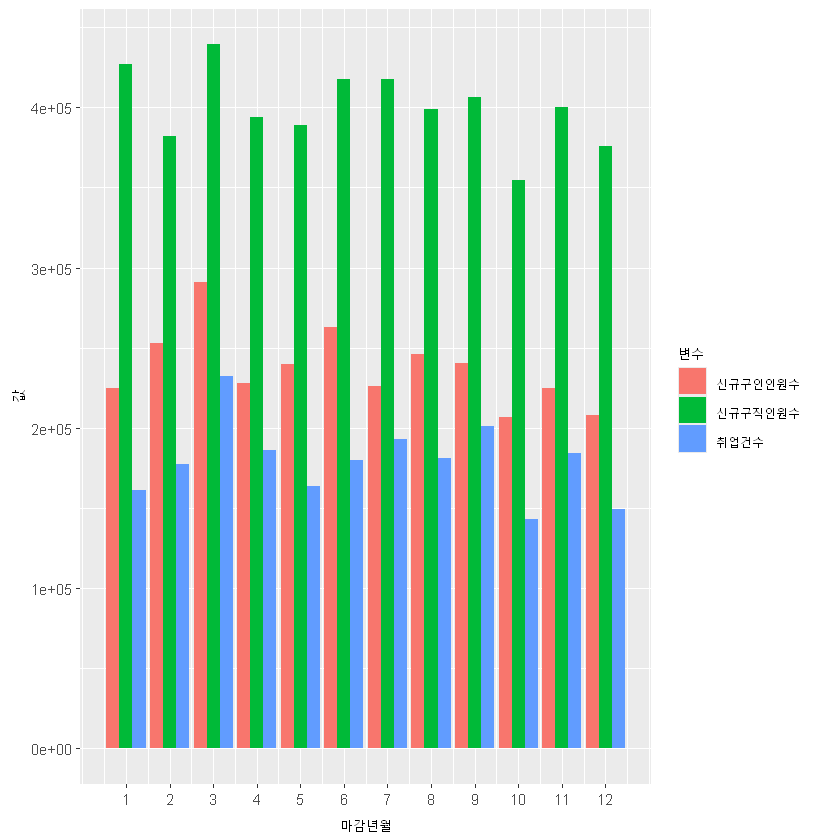

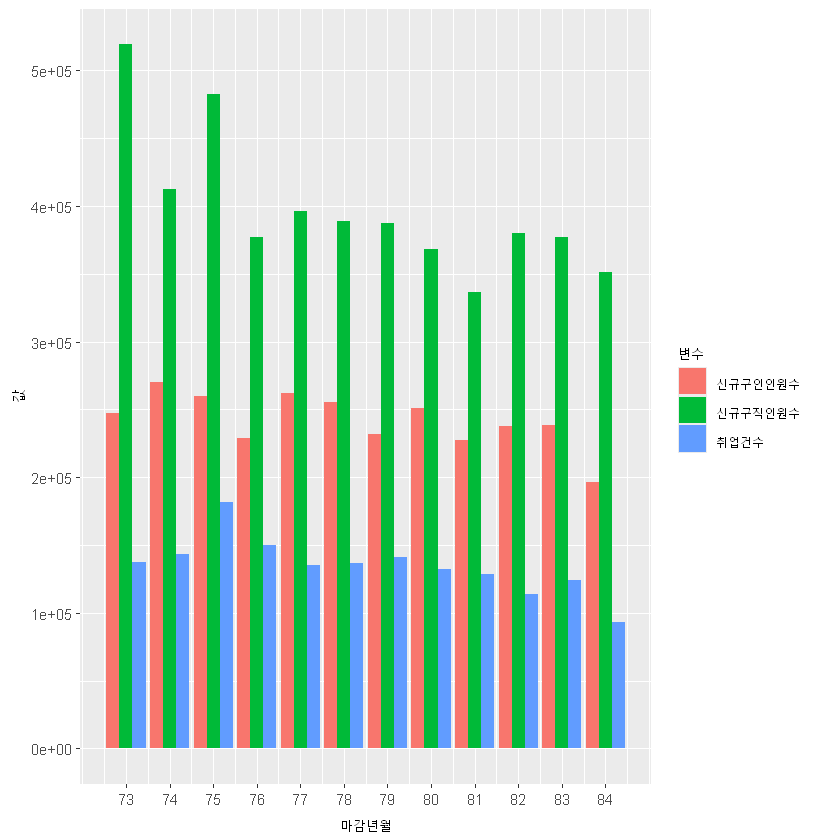

In [52]:
library(ggplot2)
library(reshape2)

# 2017년 데이터 필터링
agg_2017 <- subset(agg, 마감년월 <= 12)

# 데이터 long 형태로 변환
agg_2017_long <- melt(agg_2017, id.vars = "마감년월", 
                      measure.vars = c("신규구인인원수", "신규구직인원수", "취업건수"),
                      variable.name = "변수", 
                      value.name = "값")

# 2017년 그래프 그리기
ggplot(agg_2017_long, aes(x = 마감년월, y = 값, fill = 변수)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_x_continuous(breaks = 1:12)

# 2023년 데이터 필터링
agg_2023 <- subset(agg, 마감년월 >= 73)

# 데이터 long 형태로 변환
agg_2023_long <- melt(agg_2023, id.vars = "마감년월", 
                      measure.vars = c("신규구인인원수", "신규구직인원수", "취업건수"),
                      variable.name = "변수", 
                      value.name = "값")

# 2023년 그래프 그리기
ggplot(agg_2023_long, aes(x = 마감년월, y = 값, fill = 변수)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_x_continuous(breaks = 73:84)

- 분석을 보다 원활하게 하기 위해 컬럼명을 변경하였다.

In [53]:
# 컬럼명 변경
names(agg)[names(agg) == "마감년월"] <- "month"
names(agg)[names(agg) == "신규구인인원수"] <- "rc"
names(agg)[names(agg) == "신규구직인원수"] <- "fj"
names(agg)[names(agg) == "취업건수"] <- "jm"

In [54]:
head(agg)

,month,rc,fj,jm
,<int>,<int>,<int>,<int>
1,1,224983,426861,161230
2,2,252792,382156,177487
3,3,291239,439622,232056
4,4,227691,393868,186073
5,5,240140,389291,163494
6,6,262634,417662,179860


- 이제 2017년 1월부터 2023년 12월까지의 rc(신규구인인원수), fj(신규구직인원수), jm(취업건수) 데이터를 얻었다.
- 시차를 감안하여 검증해야 할 가설을 다시 생각해보면 2017년 7월의 취업건수는 ①해당월, ②해당월+직전월, ③직전3개월, ④직전6개월 의 rc와 fj에 영향을 받을 수 있다는 내용이다.
- 따라서, 데이터셋에 해당 기간의 rc와 fj를 추가할 필요가 있다.

In [55]:
# 새로운 컬럼 추가: 신규구인_0to1
agg$rc_0to1 <- sapply(agg$month, function(month) {
  if (month >= 2) {
    sum(agg$rc[agg$month <= month & agg$month >= month-1]/2, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구인_1to3
agg$rc_1to3 <- sapply(agg$month, function(month) {
  if (month >= 4) {
    sum(agg$rc[agg$month <= month-1 & agg$month >= month-3]/3, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구인_1to6
agg$rc_1to6 <- sapply(agg$month, function(month) {
  if (month >= 7) {
    sum(agg$rc[agg$month <= month-1 & agg$month >= month-6]/6, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구직_0to1
agg$fj_0to1 <- sapply(agg$month, function(month) {
  if (month >= 2) {
    sum(agg$fj[agg$month <= month & agg$month >= month-1]/2, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구직_1to3
agg$fj_1to3 <- sapply(agg$month, function(month) {
  if (month >= 4) {
    sum(agg$fj[agg$month <= month-1 & agg$month >= month-3]/3, na.rm = TRUE)
  } else {
    NA
  }
})

# 새로운 컬럼 추가: 신규구직_1to6
agg$fj_1to6 <- sapply(agg$month, function(month) {
  if (month >= 7) {
    sum(agg$fj[agg$month <= month-1 & agg$month >= month-6]/6, na.rm = TRUE)
  } else {
    NA
  }
})


In [56]:
# 추가된 컬럼을 확인한다.
head(agg, 10)

,month,rc,fj,jm,rc_0to1,rc_1to3,rc_1to6,fj_0to1,fj_1to3,fj_1to6
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,224983,426861,161230,NA,NA,NA,NA,NA,NA
2,2,252792,382156,177487,238887.5,NA,NA,404508.5,NA,NA
3,3,291239,439622,232056,272015.5,NA,NA,410889.0,NA,NA
4,4,227691,393868,186073,259465.0,256338.0,NA,416745.0,416213.0,NA
5,5,240140,389291,163494,233915.5,257240.7,NA,391579.5,405215.3,NA
6,6,262634,417662,179860,251387.0,253023.3,NA,403476.5,407593.7,NA
7,7,226400,417453,193099,244517.0,243488.3,249913.2,417557.5,400273.7,408243.3
8,8,246381,399056,181303,236390.5,243058.0,250149.3,408254.5,408135.3,406675.3
9,9,240530,406449,201418,243455.5,245138.3,249080.8,402752.5,411390.3,409492.0


#### (5) 데이터셋 마무리하기
- 데이터셋 통합작업은 거의 마무리되었다.
- 마지막으로 agg 변수의 데이터를 result 로 복사하고 작업을 끝낸다.
- 이때 month 1~6 인 데이터에는 일부 값들이 존재하지 않으므로 month가 7 이상인 데이터만 복사한다.
- 나중에 예측값이 결과값과 비슷한지 확인하기 위해 month가 79 이상인 값은 제외한다.
- 분석 편의를 위해 컬럼 순서를 조정한다.

In [57]:
# month가 7~78인 데이터만 복사
result = agg[agg$month >= 7 & agg$month <=78, ]

# 컬럼 순서 조정
result = result[,c(1,4,2,5,6,7,3,8,9,10)]

# 결과 확인
head(result)

,month,jm,rc,rc_0to1,rc_1to3,rc_1to6,fj,fj_0to1,fj_1to3,fj_1to6
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
7,7,193099,226400,244517.0,243488.3,249913.2,417453,417557.5,400273.7,408243.3
8,8,181303,246381,236390.5,243058.0,250149.3,399056,408254.5,408135.3,406675.3
9,9,201418,240530,243455.5,245138.3,249080.8,406449,402752.5,411390.3,409492.0
10,10,142960,206689,223609.5,237770.3,240629.3,354656,380552.5,407652.7,403963.2
11,11,184554,225083,215886.0,231200.0,237129.0,400080,377368.0,386720.3,397427.8
12,12,149127,208102,216592.5,224100.7,234619.5,375863,387971.5,387061.7,399226.0


### 2. 빈도론적 방법으로 분석하기

#### (1) 데이터 탐색

- 빈도론적 방법을 사용하든, 베이지안 방법을 사용하든 첫번째로 해야하는 작업은 데이터 탐색이다.
- summary, pairs, cor 함수 등을 사용하여 데이터를 탐색한다.

In [58]:
summary(result)

     month             jm               rc            rc_0to1      
 Min.   : 7.00   Min.   :102486   Min.   :121563   Min.   :132603  
 1st Qu.:24.75   1st Qu.:129421   1st Qu.:179298   1st Qu.:180144  
 Median :42.50   Median :141741   Median :209266   Median :213030  
 Mean   :42.50   Mean   :144052   Mean   :217124   Mean   :217176  
 3rd Qu.:60.25   3rd Qu.:151991   3rd Qu.:250021   3rd Qu.:246168  
 Max.   :78.00   Max.   :202561   Max.   :306400   Max.   :291085  
    rc_1to3          rc_1to6             fj            fj_0to1      
 Min.   :136697   Min.   :154338   Min.   :277838   Min.   :295291  
 1st Qu.:179585   1st Qu.:181421   1st Qu.:342265   1st Qu.:351767  
 Median :212373   Median :213958   Median :376434   Median :377603  
 Mean   :217018   Mean   :217051   Mean   :380163   Mean   :380364  
 3rd Qu.:247804   3rd Qu.:250549   3rd Qu.:407366   3rd Qu.:408064  
 Max.   :290335   Max.   :287254   Max.   :605342   Max.   :539375  
    fj_1to3          fj_1to6      
 Min. 

- 데이터셋 요약결과를 보면
  - 취업건수(jm)의 평균은 144052이고, 범위는 102486~202561 이다.
  - 신규구인인원수(rc)의 평균은 217124이고, 범위는 121563~306400 이다.
  - 신규구직인원수(fj)의 평균은 380163이고, 범위는 277838~605342 이다.

In [60]:
cor(result[,-1])

,jm,rc,rc_0to1,rc_1to3,rc_1to6,fj,fj_0to1,fj_1to3,fj_1to6
jm,1.0000000,0.2851149,0.2371438,0.1823141,0.1884745,0.3440267,0.2832247,0.4092252,0.3877816
rc,0.2851149,1.0000000,0.9577845,0.8855745,0.8636705,0.3856929,0.3979663,0.5069245,0.6609657
rc_0to1,0.2371438,0.9577845,1.0000000,0.9556007,0.9283011,0.3405264,0.4197884,0.5189240,0.6758317
rc_1to3,0.1823141,0.8855745,0.9556007,1.0000000,0.9792928,0.2625338,0.3649996,0.4615846,0.6092115
rc_1to6,0.1884745,0.8636705,0.9283011,0.9792928,1.0000000,0.2293715,0.3130252,0.4008869,0.5362727
fj,0.3440267,0.3856929,0.3405264,0.2625338,0.2293715,1.0000000,0.8097939,0.4707790,0.4350676
fj_0to1,0.2832247,0.3979663,0.4197884,0.3649996,0.3130252,0.8097939,1.0000000,0.7663822,0.6467401
fj_1to3,0.4092252,0.5069245,0.5189240,0.4615846,0.4008869,0.4707790,0.7663822,1.0000000,0.8791488
fj_1to6,0.3877816,0.6609657,0.6758317,0.6092115,0.5362727,0.4350676,0.6467401,0.8791488,1.0000000


- 변수의 상관계수를 확인해보면
  - rc, rc_0to1, rc_1to3, rc_1to6 변수 사이의 상관계수가 모두 0.8 이상으로 나타난다.
  - fj, fj_0to1, fj_1to3, fj_1to6 변수 사이에도 비교적 상관관계가 높은(0.8 이상인) 관계가 다수 존재한다.

- 이러한 경향은 산점도를 통해 다시 확인할 수 있다.

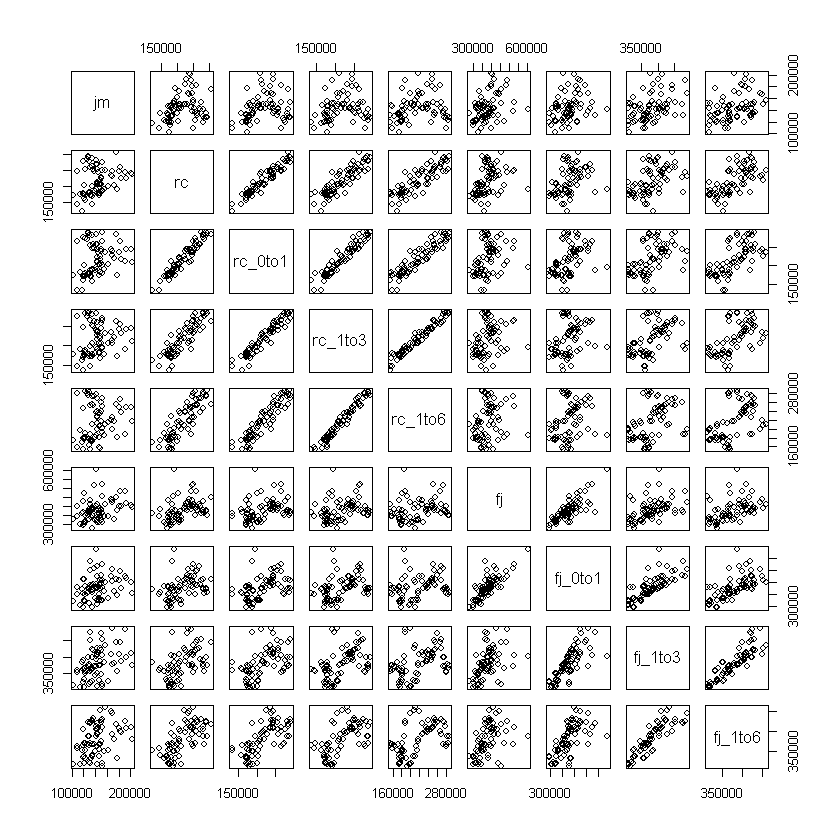

In [61]:
pairs(result[,-1])

#### (2) 다중선형회귀 수행하기

- 우선 반응변수와 독립변수 간에 선형관계가 성립한다고 가정한다.
  - 여기서 선형관계가 성립한다고 가정한 이유는 구인인원이나 구직인원이 많아질수록 취업건수에 긍정적인 영향을 미친다고 보는 것이 상식적이기 때문이다.
- 어떤 변수를 사용해서 모델을 생성할 것인지 결정해야 하는데, 많이 사용하는 방법으로 전진선택법, 후진제거법, 단계적 선택법이 있다.
- 그리고 변수를 선택함에 있어 다중공선성 문제도 확인해 봐야 한다.
  - 다중공선성을 확인하기 위해서는 car 라이브러리의 VIF 함수를 사용한다.

In [75]:
# 다중선형회귀 모델 생성
model_full = lm(jm ~ rc + rc_0to1 + rc_1to3 + rc_1to6 + fj + fj_0to1 + fj_1to3 + fj_1to6, data=result)

summary(model_full)

library(car)
vif(model_full)


Call:
lm(formula = jm ~ rc + rc_0to1 + rc_1to3 + rc_1to6 + fj + fj_0to1 + 
    fj_1to3 + fj_1to6, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-36052 -11663  -1495   9722  45851 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.067e+04  2.808e+04   1.448  0.15248   
rc           2.914e-02  2.196e-01   0.133  0.89487   
rc_0to1     -9.897e-03  3.472e-01  -0.029  0.97735   
rc_1to3     -5.226e-01  3.848e-01  -1.358  0.17920   
rc_1to6      4.779e-01  3.142e-01   1.521  0.13319   
fj           2.271e-01  8.370e-02   2.713  0.00858 **
fj_0to1     -3.290e-01  1.381e-01  -2.383  0.02019 * 
fj_1to3      3.244e-01  1.481e-01   2.190  0.03220 * 
fj_1to6      6.375e-02  1.602e-01   0.398  0.69194   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19440 on 63 degrees of freedom
Multiple R-squared:  0.3144,	Adjusted R-squared:  0.2274 
F-statistic: 3.612 on 8 and 63 DF,  p-value: 0.001638


rc   rc_0to1   rc_1to3   rc_1to6        fj   fj_0to1   fj_1to3   fj_1to6 
16.710528 38.423438 45.593599 29.195152  4.529462  8.114890  8.103941  7.010508

- 모든 변수를 포함한 전체 모델을 살펴본 결과 rc 그룹의 변수들은 vif_value 가 매우 높게 나타났다.
- 이를 개선하기 위해 vif_value가 높은 rc_1to3, rc_0to1 변수를 제외하고, 다시 모델을 적합한다.

In [78]:
# 다중선형회귀 모델 생성
model_full = lm(jm ~ rc + rc_1to6 + fj + fj_0to1 + fj_1to3 + fj_1to6, data=result)

summary(model_full)

library(car)
vif(model_full)


Call:
lm(formula = jm ~ rc + rc_1to6 + fj + fj_0to1 + fj_1to3 + fj_1to6, 
    data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-30222 -13103  -2580   9625  47948 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  5.529e+04  2.618e+04   2.112  0.03850 * 
rc          -2.775e-02  1.328e-01  -0.209  0.83510   
rc_1to6      2.774e-02  1.235e-01   0.225  0.82288   
fj           2.487e-01  8.156e-02   3.049  0.00332 **
fj_0to1     -3.681e-01  1.331e-01  -2.766  0.00737 **
fj_1to3      3.653e-01  1.445e-01   2.528  0.01392 * 
fj_1to6     -1.257e-02  1.508e-01  -0.083  0.93382   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19510 on 65 degrees of freedom
Multiple R-squared:  0.2878,	Adjusted R-squared:  0.2221 
F-statistic: 4.379 on 6 and 65 DF,  p-value: 0.000897


rc  rc_1to6       fj  fj_0to1  fj_1to3  fj_1to6 
6.067827 4.476811 4.271867 7.487943 7.660151 6.171287

- 다중공선성을 판단하는 기준이 되는 vif_value가 10 이상인 변수는 없는 것으로 나타남
- "jm ~ rc + rc_1to6 + fj + fj_0to1 + fj_1to3 + fj_1to6" 모델을 model_full 로 하여 전진선택법, 후진제거법, 단계적 선택법을 실행한다.

In [80]:
# 전진선택법
model_forward = step(lm(jm ~ 1, data=result), scope=formula(model_full), direction="forward")

# 후진제거법
model_backward = step(model_full, direction="backward")

# 단계적 선택법
model_both = step(lm(jm ~ 1, data=result), scope=formula(model_full), direction="both")

# 모델 요약 출력
summary(model_forward)
summary(model_backward)
summary(model_both)

Start:  AIC=1441.59
jm ~ 1

          Df  Sum of Sq        RSS    AIC
+ fj_1to3  1 5816853083 2.8918e+10 1430.4
+ fj_1to6  1 5223212663 2.9511e+10 1431.9
+ fj       1 4111001816 3.0624e+10 1434.5
+ rc       1 2823599253 3.1911e+10 1437.5
+ fj_0to1  1 2786285717 3.1948e+10 1437.6
+ rc_1to6  1 1233867890 3.3501e+10 1441.0
<none>                  3.4735e+10 1441.6

Step:  AIC=1430.4
jm ~ fj_1to3

          Df  Sum of Sq        RSS    AIC
+ fj       1 1022516840 2.7895e+10 1429.8
<none>                  2.8918e+10 1430.4
+ rc       1  281999963 2.8636e+10 1431.7
+ fj_1to6  1  120013938 2.8798e+10 1432.1
+ fj_0to1  1   77780029 2.8840e+10 1432.2
+ rc_1to6  1   24682912 2.8893e+10 1432.3

Step:  AIC=1429.8
jm ~ fj_1to3 + fj

          Df  Sum of Sq        RSS    AIC
+ fj_0to1  1 3132467301 2.4763e+10 1423.2
<none>                  2.7895e+10 1429.8
+ rc       1  116944955 2.7778e+10 1431.5
+ fj_1to6  1   87532402 2.7808e+10 1431.6
+ rc_1to6  1   11319986 2.7884e+10 1431.8

Step:  AIC=1423.23


Call:
lm(formula = jm ~ fj_1to3 + fj + fj_0to1, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-29429 -12610  -3006   9588  48320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.597e+04  2.054e+04   2.724 0.008182 ** 
fj_1to3      3.475e-01  8.664e-02   4.011 0.000153 ***
fj           2.399e-01  7.170e-02   3.346 0.001338 ** 
fj_0to1     -3.559e-01  1.213e-01  -2.933 0.004573 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19080 on 68 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2556 
F-statistic: 9.128 on 3 and 68 DF,  p-value: 3.714e-05



Call:
lm(formula = jm ~ fj + fj_0to1 + fj_1to3, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-29429 -12610  -3006   9588  48320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.597e+04  2.054e+04   2.724 0.008182 ** 
fj           2.399e-01  7.170e-02   3.346 0.001338 ** 
fj_0to1     -3.559e-01  1.213e-01  -2.933 0.004573 ** 
fj_1to3      3.475e-01  8.664e-02   4.011 0.000153 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19080 on 68 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2556 
F-statistic: 9.128 on 3 and 68 DF,  p-value: 3.714e-05



Call:
lm(formula = jm ~ fj_1to3 + fj + fj_0to1, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-29429 -12610  -3006   9588  48320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.597e+04  2.054e+04   2.724 0.008182 ** 
fj_1to3      3.475e-01  8.664e-02   4.011 0.000153 ***
fj           2.399e-01  7.170e-02   3.346 0.001338 ** 
fj_0to1     -3.559e-01  1.213e-01  -2.933 0.004573 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19080 on 68 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2556 
F-statistic: 9.128 on 3 and 68 DF,  p-value: 3.714e-05


- 어떤 방법을 사용하더라도 적합된 모형은 "jm ~ fj_1to3 + fj + fj_0to1" 이다.

- fj_0to1은 fj와도 1개월의 수치가 겹치고, fj_1to3과도 1개월의 수치가 겹치기 때문에 "jm ~ fj + fj_1to3" 모델도 적합해보았다.

In [81]:
# jm ~ fj_1to3 + rc_1to6" 모델을 적합
model1 = lm(jm ~ fj + fj_1to3, data=result)
summary(model1)

# jm ~ fj_1to3 + rc_1to6" 모델을 적합
model2 = lm(jm ~ fj + fj_0to1 + fj_1to3, data=result)
summary(model2)


Call:
lm(formula = jm ~ fj + fj_1to3, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-31514 -12796  -3927  12734  58181 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 5.588e+04  2.165e+04   2.582   0.0120 *
fj          7.332e-02  4.610e-02   1.590   0.1163  
fj_1to3     1.584e-01  6.099e-02   2.598   0.0115 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20110 on 69 degrees of freedom
Multiple R-squared:  0.1969,	Adjusted R-squared:  0.1736 
F-statistic: 8.459 on 2 and 69 DF,  p-value: 0.0005182



Call:
lm(formula = jm ~ fj + fj_0to1 + fj_1to3, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-29429 -12610  -3006   9588  48320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.597e+04  2.054e+04   2.724 0.008182 ** 
fj           2.399e-01  7.170e-02   3.346 0.001338 ** 
fj_0to1     -3.559e-01  1.213e-01  -2.933 0.004573 ** 
fj_1to3      3.475e-01  8.664e-02   4.011 0.000153 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19080 on 68 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2556 
F-statistic: 9.128 on 3 and 68 DF,  p-value: 3.714e-05


- 예상외로 fj_0to1을 제외한 경우 모델의 설명력이 크게 저하되었다.
- fj_0to1의 계수가 -0.3559인 것을 감안하면 취업건수와 구직인원수 사이에 비선형성이 존재하고, fj_0to1 변수를 통해 비선형성에 대한 설명이 이루어지기 때문이라고 예상했다.
- 최종 모형은 "jm ~ fj + fj_0to1 + fj_1to3" 이다.
  - 적합된 결과는 $jm = 55970 + 0.2399\cdot fj - 0.3559\cdot fj_{0to1} + 0.3475\cdot fj_{1to3}$ 이다.
  - 취업건수를 예측함에 있어 해당 월의 구직건수(fj)와 1개월 전부터 3개월 전까지의 구직건수(fj_1to3)는 취업건수를 더 크게 예측하게 하고, \
  해당 월의 구직건수와 1개월 전의 구직건수의 합(fj_0to1)은 취업건수를 더 작게 예측하게 한다.

- [참고] 적합된 식을 다르게 표현하면 $jm = 55970 + 0.2399\cdot fj_0 - 0.1780\cdot (fj_0 + fj_1) + 0.1158\cdot (fj_1 + fj_2 + fj_3)$ 이고,
  - 이를 정리하면 $jm = 55790 + 0.0619\cdot fj_0 - 0.0622\cdot fj_1 + 0.1158\cdot fj_2 + 0.1158\cdot fj_3$ 이 된다.

적합된 결과는 $jm = 55970 + 0.2399\cdot fj - 0.3559\cdot fj_{0to1} + 0.3475\cdot fj_{1to3}$ 이다.

이 식을 활용하여 agg 변수에서 month가 79이상인 값(즉, 2023년 하반기)의 취업건수를 예측해보고, 실제 값과 비교해본다.

In [ ]:
test_set = agg[agg$month>=79,]

test_set$predicted_jm = 55970 + 0.2399 * test_set$fj - 0.3599 * test_set$fj_0to1 + 0.3475 * test_set$fj_1to3
test_set$diff = test_set$jm - test_set$predicted_jm

test_set

,month,rc,fj,jm,rc_0to1,rc_1to3,rc_1to6,fj_0to1,fj_1to3,fj_1to6,predicted_jm,diff
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
79,79,231802,387359,140918,243497.5,248796.7,253791.0,387999.0,387392.0,429460.5,143875.3,-2957.304
80,80,250684,368165,131946,241243.0,249661.0,251262.8,377762.0,390728.7,407437.8,144114.5,-12168.451
81,81,227271,336295,128790,238977.5,245893.0,248064.5,352230.0,381387.7,400031.5,142411.8,-13621.808
82,82,237384,379926,113965,232327.5,236585.7,242691.2,358110.5,363939.7,375665.8,144699.3,-30734.313
83,83,238626,376706,124458,238005.0,238446.3,244053.7,378316.0,361462.0,376095.3,135793.9,-11335.886
84,84,196386,351074,93504,217506.0,234427.0,240160.0,363890.0,364309.0,372848.3,135826.0,-42322.019


-

In [71]:
# jm ~ fj_1to3" 모델을 적합
model2 = lm(jm ~ fj_1to3, data=result)
summary(model2)


Call:
lm(formula = jm ~ fj_1to3, data = result)

Residuals:
   Min     1Q Median     3Q    Max 
-31747 -13548  -5173  12216  59638 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.637e+04  2.084e+04   3.185 0.002162 ** 
fj_1to3     2.041e-01  5.439e-02   3.752 0.000358 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20330 on 70 degrees of freedom
Multiple R-squared:  0.1675,	Adjusted R-squared:  0.1556 
F-statistic: 14.08 on 1 and 70 DF,  p-value: 0.000358


In [20]:
rc2 = aggregate(신규구인인원수 ~ 마감년월 + 표준산업대분류, data=rc, sum, na.rm=TRUE)

In [21]:
summary(rc2)

    마감년월      표준산업대분류     신규구인인원수  
 Min.   :201701   Length:1762        Min.   :     1  
 1st Qu.:201809   Class :character   1st Qu.:  1571  
 Median :202006   Mode  :character   Median :  4970  
 Mean   :202006                      Mean   : 10508  
 3rd Qu.:202204                      3rd Qu.: 11118  
 Max.   :202312                      Max.   :126198  

In [22]:
nrow(rc)
nrow(rc2)

[1] 7074327

[1] 1762

In [23]:
head(rc2[order(-rc2$신규구인인원수),], 10)

,마감년월,표준산업대분류,신규구인인원수
,<int>,<chr>,<int>
231,202203,C,126198
237,202209,C,119693
171,201703,C,117791
234,202206,C,112303
233,202205,C,111195
239,202211,C,108108
232,202204,C,108045
235,202207,C,107222
174,201706,C,105107


In [24]:
# '마감년월'에서 연도만 추출하여 새로운 '연도' 변수 추가
rc$연도 <- substr(as.character(rc$마감년월), 1, 4)

# 연도별 신규구인인원수 합계 구하기
yearly_recruitment <- aggregate(신규구인인원수 ~ 연도, data = rc, sum)

# 결과 출력
print(yearly_recruitment)

  연도 신규구인인원수
1 2017        2852664
2 2018        2436823
3 2019        2128728
4 2020        2045112
5 2021        2829040
6 2022        3317302
7 2023        2904899


In [25]:
# '마감년월'에서 연도만 추출하여 새로운 '연도' 변수 추가
rc2$연도 <- substr(as.character(rc2$마감년월), 1, 4)

# 연도별 신규구인인원수 합계 구하기
yearly_recruitment_rc2 <- aggregate(신규구인인원수 ~ 연도, data = rc2, sum)

# 결과 출력
print(yearly_recruitment_rc2)


  연도 신규구인인원수
1 2017        2852664
2 2018        2436823
3 2019        2128728
4 2020        2045112
5 2021        2829040
6 2022        3317302
7 2023        2904899


In [26]:
# 파일 이름 리스트 작성
file_names <- c(  
  "find_job_2017.txt",
  "find_job_2018.txt",
  "find_job_2019.txt",
  "find_job_2020.txt",
  "find_job_2021.txt",
  "find_job_2022.txt",
  "find_job_2023.txt"
)

# 파일을 하나씩 읽어서 병합
fj <- do.call(rbind, lapply(file_names, function(file) {
  read.table(file, header = TRUE, sep = "|", stringsAsFactors = FALSE)
}))

In [27]:
head(fj)

summary(fj)

,마감년월,직종중분류,직종버전,고용형태,거주시도,거주시군구,성별,연령5세단위,학력,신규구직인원수
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,201712,70000,2007,10,45,45130,M,3,4,1
2,201712,130000,2007,10,48,48310,M,6,5,1
3,201712,40000,2007,10,45,45130,F,3,4,2
4,201712,60000,2007,10,45,45130,F,8,3,3
5,201712,150000,2007,10,45,45130,M,4,3,2
6,201712,190000,2007,99,45,45130,M,4,5,1


    마감년월       직종중분류           직종버전       고용형태    
 Min.   :201701   Length:24907211    Min.   :2007   Min.   :10.00  
 1st Qu.:201811   Class :character   1st Qu.:2018   1st Qu.:10.00  
 Median :202010   Mode  :character   Median :2018   Median :11.00  
 Mean   :202019                      Mean   :2016   Mean   :42.89  
 3rd Qu.:202205                      3rd Qu.:2018   3rd Qu.:99.00  
 Max.   :202312                      Max.   :2018   Max.   :99.00  
   거주시도          거주시군구            성별            연령5세단위    
 Length:24907211    Length:24907211    Length:24907211    Min.   : 3.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 6.000  
                                                          Mean   : 6.152  
                                                          3rd Qu.: 8.000  
                                                          Max.   :12.000  
     학력           신규구직인원수    
 L

In [28]:
fj2 = aggregate(신규구직인원수 ~ 마감년월, data=fj, sum, na.rm=TRUE)

In [29]:
# 파일 이름 리스트 작성
file_names <- c(  
  "job_matching_2017.txt",
  "job_matching_2018.txt",
  "job_matching_2019.txt",
  "job_matching_2020.txt",
  "job_matching_2021.txt",
  "job_matching_2022.txt",
  "job_matching_2023.txt"
)

# 파일을 하나씩 읽어서 병합
jm <- do.call(rbind, lapply(file_names, function(file) {
  read.table(file, header = TRUE, sep = "|", stringsAsFactors = FALSE)
}))

In [30]:
head(jm)

summary(jm)

,마감년월,근무시도,근무시군구,표준산업대분류,산업버전,직종중분류,직종버전,고용형태,거주시도,거주시군구,성별,연령5세단위,학력,취업건수
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,201712,26,26000,y,y,110000,2007,10,26,26200,M,10,3,2
2,201712,26,26320,y,y,220000,2007,99,26,26320,M,10,3,1
3,201712,41,41130,y,y,110000,2007,10,41,41610,M,11,3,1
4,201712,42,42810,y,y,230000,2007,20,42,42810,M,7,3,1
5,201712,43,43113,S,10,120000,2007,10,43,43114,F,3,5,1
6,201712,11,11380,y,y,110000,2007,10,11,11380,F,3,4,1


    마감년월        근무시도          근무시군구        표준산업대분류    
 Min.   :201701   Length:9412398     Length:9412398     Length:9412398    
 1st Qu.:201807   Class :character   Class :character   Class :character  
 Median :202007   Mode  :character   Mode  :character   Mode  :character  
 Mean   :202002                                                           
 3rd Qu.:202203                                                           
 Max.   :202312                                                           
   산업버전          직종중분류           직종버전       고용형태    
 Length:9412398     Length:9412398     Min.   :2007   Min.   :10.00  
 Class :character   Class :character   1st Qu.:2018   1st Qu.:10.00  
 Mode  :character   Mode  :character   Median :2018   Median :10.00  
                                       Mean   :2016   Mean   :35.66  
                                       3rd Qu.:2018   3rd Qu.:99.00  
                                       Max.   :2018   Max.   :99.00  
   거주시도          거주시군구

In [31]:
jm2 = aggregate(취업건수 ~ 마감년월+표준산업대분류, data=jm, sum, na.rm=TRUE)

In [32]:
head(jm2)

summary(jm2)

,마감년월,표준산업대분류,취업건수
,<int>,<chr>,<int>
1,201701,A,376
2,201702,A,468
3,201703,A,591
4,201704,A,460
5,201705,A,472
6,201706,A,412


    마감년월      표준산업대분류        취업건수       
 Min.   :201701   Length:1783        Min.   :     1.0  
 1st Qu.:201809   Class :character   1st Qu.:   169.5  
 Median :202006   Mode  :character   Median :   563.0  
 Mean   :202005                      Mean   :  6845.5  
 3rd Qu.:202203                      3rd Qu.:  2812.0  
 Max.   :202312                      Max.   :178210.0  

In [33]:
# 마감년월을 연도와 월로 분리하고 새롭게 변환된 값으로 변경
convert_month <- function(df) {
  # 마감년월을 연도와 월로 분리
  year <- floor(df$마감년월 / 100)  # 연도 추출 (2017, 2018, ...)
  month <- df$마감년월 %% 100      # 월 추출 (01, 02, ...)
  
  # 기준 연도를 설정하고, 마감년월을 1부터 시작하도록 변경
  base_year <- min(year)  # 가장 작은 연도를 기준으로 설정
  df$마감년월 <- (year - base_year) * 12 + month  # (연도 차이 * 12) + 월
  
  return(df)
}

# rc2, fj2, jm2 모두 적용
rc2 <- convert_month(rc2)
fj2 <- convert_month(fj2)
jm2 <- convert_month(jm2)

In [34]:
head(rc2)

,마감년월,표준산업대분류,신규구인인원수,연도
,<dbl>,<chr>,<int>,<chr>
1,1,A,7945,2017
2,2,A,4448,2017
3,3,A,14965,2017
4,4,A,5669,2017
5,5,A,3921,2017
6,6,A,5961,2017


In [35]:
# 1. 2018년 이후 자료만 필터링
jm2_filtered <- jm2[jm2$마감년월 >= 13, ]  # 201801부터 사용 (마감년월 = 13은 2018년 1월)

# 2. 6개월 이전 데이터 생성 함수 (표준산업대분류도 고려)
create_lagged_data <- function(df, target_col) {
  lagged_data <- data.frame()  # 빈 데이터프레임 생성
  
  # 각 마감년월에 대해 이전 6개월 데이터를 붙여주기
  for(i in 7:nrow(df)) {  # 6개월 이상의 데이터부터 시작
    temp_row <- df[i, ]
    for(j in 1:6) {
      temp_row[[paste(j, "개월전", target_col, sep = "_")]] <- df[i - j, target_col]
    }
    lagged_data <- rbind(lagged_data, temp_row)
  }
  
  return(lagged_data)
}

# 3. rc2와 fj2 데이터에서 신규구인인원수, 신규구직인원수 컬럼을 이전 6개월치로 변환
rc2_lagged <- create_lagged_data(rc2, "신규구인인원수")
fj2_lagged <- create_lagged_data(fj2, "신규구직인원수")

# 4. 6개월치 데이터를 합치기 (마감년월과 표준산업대분류 기준으로 병합)
# `jm2_filtered`는 마감년월 기준으로 이미 필터링된 데이터입니다.
result <- merge(jm2_filtered, rc2_lagged, by = c("마감년월", "표준산업대분류"), all.x = TRUE)
result <- merge(result, fj2_lagged, by = "마감년월", all.x = TRUE)

# 결과 확인
head(result)


,마감년월,표준산업대분류,취업건수,신규구인인원수,연도,1_개월전_신규구인인원수,2_개월전_신규구인인원수,3_개월전_신규구인인원수,4_개월전_신규구인인원수,5_개월전_신규구인인원수,6_개월전_신규구인인원수,신규구직인원수,1_개월전_신규구직인원수,2_개월전_신규구직인원수,3_개월전_신규구직인원수,4_개월전_신규구직인원수,5_개월전_신규구직인원수,6_개월전_신규구직인원수
,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,13,A,247,9250,2018,9570,3934,3913,6638,4266,5104,434846,375863,400080,354656,406449,399056,417453
2,13,B,6,173,2018,108,153,188,167,177,192,434846,375863,400080,354656,406449,399056,417453
3,13,C,5209,86247,2018,68258,79808,75990,92156,87426,81378,434846,375863,400080,354656,406449,399056,417453
4,13,D,22,468,2018,376,404,368,375,532,493,434846,375863,400080,354656,406449,399056,417453
5,13,E,89,1461,2018,1110,1274,1105,1256,1394,1259,434846,375863,400080,354656,406449,399056,417453
6,13,F,429,13404,2018,12298,12735,11618,12910,13446,14549,434846,375863,400080,354656,406449,399056,417453


In [36]:
result

마감년월,표준산업대분류,취업건수,신규구인인원수,연도,1_개월전_신규구인인원수,2_개월전_신규구인인원수,3_개월전_신규구인인원수,4_개월전_신규구인인원수,5_개월전_신규구인인원수,6_개월전_신규구인인원수,신규구직인원수,1_개월전_신규구직인원수,2_개월전_신규구직인원수,3_개월전_신규구직인원수,4_개월전_신규구직인원수,5_개월전_신규구직인원수,6_개월전_신규구직인원수
<dbl>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
13,A,247,9250,2018,9570,3934,3913,6638,4266,5104,434846,375863,400080,354656,406449,399056,417453
13,B,6,173,2018,108,153,188,167,177,192,434846,375863,400080,354656,406449,399056,417453
13,C,5209,86247,2018,68258,79808,75990,92156,87426,81378,434846,375863,400080,354656,406449,399056,417453
13,D,22,468,2018,376,404,368,375,532,493,434846,375863,400080,354656,406449,399056,417453
13,E,89,1461,2018,1110,1274,1105,1256,1394,1259,434846,375863,400080,354656,406449,399056,417453
13,F,429,13404,2018,12298,12735,11618,12910,13446,14549,434846,375863,400080,354656,406449,399056,417453
13,G,1033,14873,2018,12877,15774,15525,16449,18213,16087,434846,375863,400080,354656,406449,399056,417453
13,H,466,4724,2018,3653,4465,4661,4470,5224,4488,434846,375863,400080,354656,406449,399056,417453
13,I,920,4799,2018,4622,7358,6168,7355,8373,7225,434846,375863,400080,354656,406449,399056,417453


In [37]:
# 상관 분석
cor_result <- cor(result[, c("취업건수", 
                              "신규구인인원수", 
                              "1_개월전_신규구인인원수", 
                              "2_개월전_신규구인인원수", 
                              "3_개월전_신규구인인원수", 
                              "4_개월전_신규구인인원수", 
                              "5_개월전_신규구인인원수", 
                              "6_개월전_신규구인인원수", 
                              "신규구직인원수", 
                              "1_개월전_신규구직인원수", 
                              "2_개월전_신규구직인원수", 
                              "3_개월전_신규구직인원수", 
                              "4_개월전_신규구직인원수", 
                              "5_개월전_신규구직인원수", 
                              "6_개월전_신규구직인원수")])

# 상관행렬 출력
print(cor_result)

                           취업건수 신규구인인원수 1_개월전_신규구인인원수
취업건수                1.000000000             NA                      NA
신규구인인원수                   NA              1                      NA
1_개월전_신규구인인원수          NA             NA                       1
2_개월전_신규구인인원수          NA             NA                      NA
3_개월전_신규구인인원수          NA             NA                      NA
4_개월전_신규구인인원수          NA             NA                      NA
5_개월전_신규구인인원수          NA             NA                      NA
6_개월전_신규구인인원수          NA             NA                      NA
신규구직인원수          0.015416310             NA                      NA
1_개월전_신규구직인원수 0.005745450             NA                      NA
2_개월전_신규구직인원수 0.020296650             NA                      NA
3_개월전_신규구직인원수 0.016605483             NA                      NA
4_개월전_신규구직인원수 0.008494506             NA                      NA
5_개월전_신규구직인원수 0.001212957             NA                      NA
6_개월전_신규구직인원수 0.00878619